In [1]:
# Import libraries
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
# storing the path to the files in a variable, road.
road = r'C:\Users\HP\Desktop\Python\videos\machine learning\DS Datasets\data_happy_sad'

# classes of the datasets
groups = ['happy', 'sad']

In [41]:
# setting a unifrom size for the images(dataset)
image_size = 100

# creating a variable in which to store the processed dataset
container = []

for group in groups:
    location = os.path.join(road, group)
    label = groups.index(group)
#     print(location)
    for image in os.listdir(location):
        img = os.path.join(location, image)
#         print(img)
        img_arr = cv2.imread(img)
#         plt.imshow(img_arr)
#         break
        img_arr = cv2.resize(img_arr, (image_size, image_size))
        container.append([img_arr, label])

In [42]:
# checking the total number of samples in the dataset
len(container) 

119

In [43]:
# checking the content of our ist image
container[0]

[array([[[216, 215, 217],
         [215, 216, 220],
         [217, 218, 222],
         ...,
         [241, 238, 240],
         [241, 238, 240],
         [241, 238, 240]],
 
        [[216, 215, 217],
         [215, 216, 220],
         [217, 218, 222],
         ...,
         [242, 239, 241],
         [242, 239, 241],
         [241, 238, 240]],
 
        [[216, 215, 217],
         [215, 216, 220],
         [217, 218, 222],
         ...,
         [242, 239, 241],
         [242, 239, 241],
         [242, 239, 241]],
 
        ...,
 
        [[160, 138,  96],
         [149, 124,  83],
         [142, 123,  91],
         ...,
         [200, 198, 190],
         [199, 197, 189],
         [197, 196, 186]],
 
        [[169, 148, 103],
         [150, 131,  88],
         [160, 137,  95],
         ...,
         [197, 195, 187],
         [195, 194, 185],
         [195, 193, 185]],
 
        [[175, 154, 109],
         [118,  97,  64],
         [141, 115,  77],
         ...,
         [193, 191, 183],
  

In [28]:
# container[1]

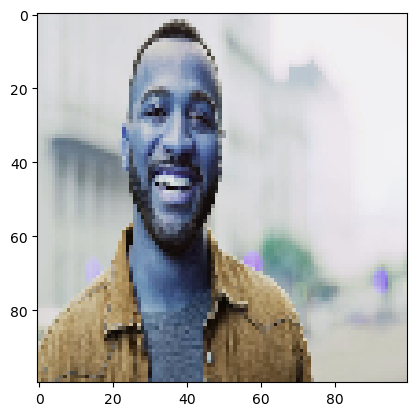

In [44]:
# Displaying the first image
plt.imshow(container[0][0])

In [45]:
# lets reshuffle the samples
import random
refined_container = random.shuffle(container)

In [46]:
# splitting to features and labels
X = []
y = []

for features,labels in container:
    X.append(features)
    y.append(labels)

In [47]:
# checking length of features and labels
len(X), len(y)

(119, 119)

In [48]:
# Converting the features and labels to numpy array for easy manipulation
X = np.array(X)
y = np.array(y)

In [49]:
# splitting to train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89, 100, 100, 3), (30, 100, 100, 3), (89,), (30,))

In [61]:
# importing the libraries for modelling
import tensorflow as tf
from tensorflow import keras

In [52]:
# modelling
model = keras.Sequential([
#     convolutional Layer sets
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation = 'relu', input_shape=(100,100,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    
#     Adding the Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics='accuracy')

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
3/3 [==============================] - 3s 158ms/step - loss: 43.4296 - accuracy: 0.5393
Epoch 2/5
3/3 [==============================] - 0s 162ms/step - loss: 7.5299 - accuracy: 0.5169
Epoch 3/5
3/3 [==============================] - 0s 158ms/step - loss: 1.7448 - accuracy: 0.5843
Epoch 4/5
3/3 [==============================] - 1s 181ms/step - loss: 0.9593 - accuracy: 0.6629
Epoch 5/5
3/3 [==============================] - 1s 170ms/step - loss: 0.4410 - accuracy: 0.7978


In [53]:
# scoring the model performance
model.evaluate(X_test, y_test)
# 70% accuracy is not bad

1/1 [==============================] - 0s 382ms/step - loss: 0.7285 - accuracy: 0.7000


[0.7284969091415405, 0.699999988079071]

In [54]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 278ms/step


In [57]:
y_preds = []

for preds in predictions:
    if preds >= 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [58]:
# Predicted labels: {0:happy, 1:sad}
np.array(y_preds[:10])

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [59]:
# True labels: {0:happy, 1:sad}
np.array(y_test[:10])

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [62]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)

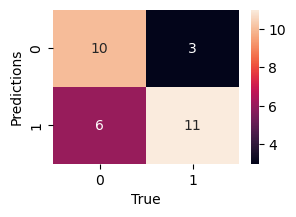

In [71]:
# plotting confusion matrix
import seaborn as sns
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predictions')
plt.show()